#Medical-DNA-Analyzer👨‍⚕️🧬🩺❤
**A python based tool for simplified DNA analysis focused on medical applications that would be more practical for doctors and healthcare providers.**

In [2]:
pip install Biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 36.5 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
from Bio.Seq import Seq
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

class MedicalDNAAnalyzer:
    """
    DNA analysis tool designed for medical professionals with focus on clinical relevance
    """
    def __init__(self, sequence):
        self.sequence = sequence.upper().replace('\n', '')
        self.length = len(sequence)

    def check_mutations(self):
        """
        Check for common disease-associated mutations
        Returns positions and types of mutations found
        """
        # Common disease-associated mutations (example patterns)
        mutation_patterns = {
            'BRCA1_mutation': {
                'pattern': 'GTAAA',
                'associated_condition': 'Breast Cancer Risk',
                'clinical_significance': 'Pathogenic',
                'recommendation': 'Recommend genetic counseling and enhanced screening'
            },
            'Cystic_Fibrosis': {
                'pattern': 'CTTT',
                'associated_condition': 'Cystic Fibrosis',
                'clinical_significance': 'Pathogenic',
                'recommendation': 'Refer to CF specialist for confirmation'
            },
            'Lynch_Syndrome': {
                'pattern': 'GCCAT',
                'associated_condition': 'Lynch Syndrome',
                'clinical_significance': 'Likely Pathogenic',
                'recommendation': 'Consider colonoscopy screening'
            }
        }

        findings = []
        for mutation_name, info in mutation_patterns.items():
            matches = list(re.finditer(info['pattern'], self.sequence))
            if matches:
                for match in matches:
                    findings.append({
                        'mutation': mutation_name,
                        'position': match.start(),
                        'sequence': match.group(),
                        'condition': info['associated_condition'],
                        'significance': info['clinical_significance'],
                        'recommendation': info['recommendation']
                    })

        return findings

    def analyze_risk_factors(self):
        """
        Analyze genetic risk factors for common diseases
        """
        risk_patterns = {
            'cardiovascular': {
                'pattern': 'AAGG',
                'risk_level': 'Moderate',
                'recommendation': 'Consider lipid panel and lifestyle modifications'
            },
            'diabetes_type2': {
                'pattern': 'CCTA',
                'risk_level': 'Elevated',
                'recommendation': 'Regular blood glucose monitoring recommended'
            },
            'alzheimers': {
                'pattern': 'TGCT',
                'risk_level': 'Increased',
                'recommendation': 'Monitor cognitive function in regular check-ups'
            }
        }

        risk_assessment = []
        for condition, info in risk_patterns.items():
            matches = list(re.finditer(info['pattern'], self.sequence))
            if matches:
                risk_assessment.append({
                    'condition': condition,
                    'risk_level': info['risk_level'],
                    'matches_found': len(matches),
                    'recommendation': info['recommendation']
                })

        return risk_assessment

    def check_drug_metabolism(self):
        """
        Analyze genetic markers related to drug metabolism
        """
        metabolism_markers = {
            'CYP2D6': {
                'pattern': 'ATGG',
                'metabolism': 'Rapid metabolizer',
                'clinical_impact': 'May require dose adjustment for certain medications'
            },
            'CYP2C19': {
                'pattern': 'TCGA',
                'metabolism': 'Poor metabolizer',
                'clinical_impact': 'Consider alternative medications or adjusted dosing'
            },
            'TPMT': {
                'pattern': 'GCTA',
                'metabolism': 'Intermediate metabolizer',
                'clinical_impact': 'Monitor drug levels closely'
            }
        }

        metabolism_results = []
        for gene, info in metabolism_markers.items():
            matches = list(re.finditer(info['pattern'], self.sequence))
            if matches:
                metabolism_results.append({
                    'gene': gene,
                    'metabolism_type': info['metabolism'],
                    'clinical_impact': info['clinical_impact']
                })

        return metabolism_results

    def generate_clinical_report(self):
        """
        Generate a clinical report with relevant findings
        """
        mutations = self.check_mutations()
        risks = self.analyze_risk_factors()
        metabolism = self.check_drug_metabolism()

        report = {
            'summary': {
                'total_mutations_found': len(mutations),
                'risk_factors_identified': len(risks),
                'metabolism_findings': len(metabolism)
            },
            'clinical_findings': {
                'mutations': mutations,
                'risk_factors': risks,
                'drug_metabolism': metabolism
            },
            'recommendations': []
        }

        # Add clinical recommendations based on findings
        for mutation in mutations:
            report['recommendations'].append({
                'type': 'Mutation',
                'finding': mutation['condition'],
                'action': mutation['recommendation']
            })

        for risk in risks:
            report['recommendations'].append({
                'type': 'Risk Factor',
                'finding': risk['condition'],
                'action': risk['recommendation']
            })

        for met in metabolism:
            report['recommendations'].append({
                'type': 'Drug Metabolism',
                'finding': met['gene'],
                'action': met['clinical_impact']
            })

        return report

    def visualize_findings(self):
        """
        Create visual summary of findings for clinical review
        """
        plt.figure(figsize=(15, 10))

        # 1. Mutation Summary
        plt.subplot(2, 2, 1)
        mutations = self.check_mutations()
        mutation_types = [m['condition'] for m in mutations]
        if mutation_types:
            sns.countplot(x=mutation_types)
            plt.title('Detected Mutations')
            plt.xticks(rotation=45)
        else:
            plt.text(0.5, 0.5, 'No mutations detected', ha='center')

        # 2. Risk Factor Summary
        plt.subplot(2, 2, 2)
        risks = self.analyze_risk_factors()
        risk_levels = [r['risk_level'] for r in risks]
        if risk_levels:
            sns.countplot(x=risk_levels)
            plt.title('Risk Levels Distribution')
            plt.xticks(rotation=45)
        else:
            plt.text(0.5, 0.5, 'No risk factors identified', ha='center')

        # 3. Drug Metabolism Profile
        plt.subplot(2, 2, 3)
        metabolism = self.check_drug_metabolism()
        metabolism_types = [m['metabolism_type'] for m in metabolism]
        if metabolism_types:
            sns.countplot(x=metabolism_types)
            plt.title('Drug Metabolism Profile')
            plt.xticks(rotation=45)
        else:
            plt.text(0.5, 0.5, 'No metabolism markers found', ha='center')

        plt.tight_layout()
        plt.show()

    def print_clinical_summary(self):
        """
        Print a concise clinical summary
        """
        report = self.generate_clinical_report()

        print("=== Clinical DNA Analysis Summary ===\n")

        print("Key Findings:")
        print(f"- Mutations detected: {report['summary']['total_mutations_found']}")
        print(f"- Risk factors identified: {report['summary']['risk_factors_identified']}")
        print(f"- Drug metabolism markers: {report['summary']['metabolism_findings']}\n")

        if report['clinical_findings']['mutations']:
            print("Important Mutations:")
            for mutation in report['clinical_findings']['mutations']:
                print(f"- {mutation['condition']}: {mutation['significance']}")
                print(f"  Recommendation: {mutation['recommendation']}\n")

        if report['clinical_findings']['risk_factors']:
            print("Risk Factors:")
            for risk in report['clinical_findings']['risk_factors']:
                print(f"- {risk['condition']}: {risk['risk_level']}")
                print(f"  Recommendation: {risk['recommendation']}\n")

        if report['clinical_findings']['drug_metabolism']:
            print("Drug Metabolism Profile:")
            for met in report['clinical_findings']['drug_metabolism']:
                print(f"- {met['gene']}: {met['metabolism_type']}")
                print(f"  Clinical Impact: {met['clinical_impact']}\n")

##Evaluation using any random patient sequence 🧬

=== Clinical DNA Analysis Summary ===

Key Findings:
- Mutations detected: 0
- Risk factors identified: 1
- Drug metabolism markers: 0

Risk Factors:
- cardiovascular: Moderate
  Recommendation: Consider lipid panel and lifestyle modifications



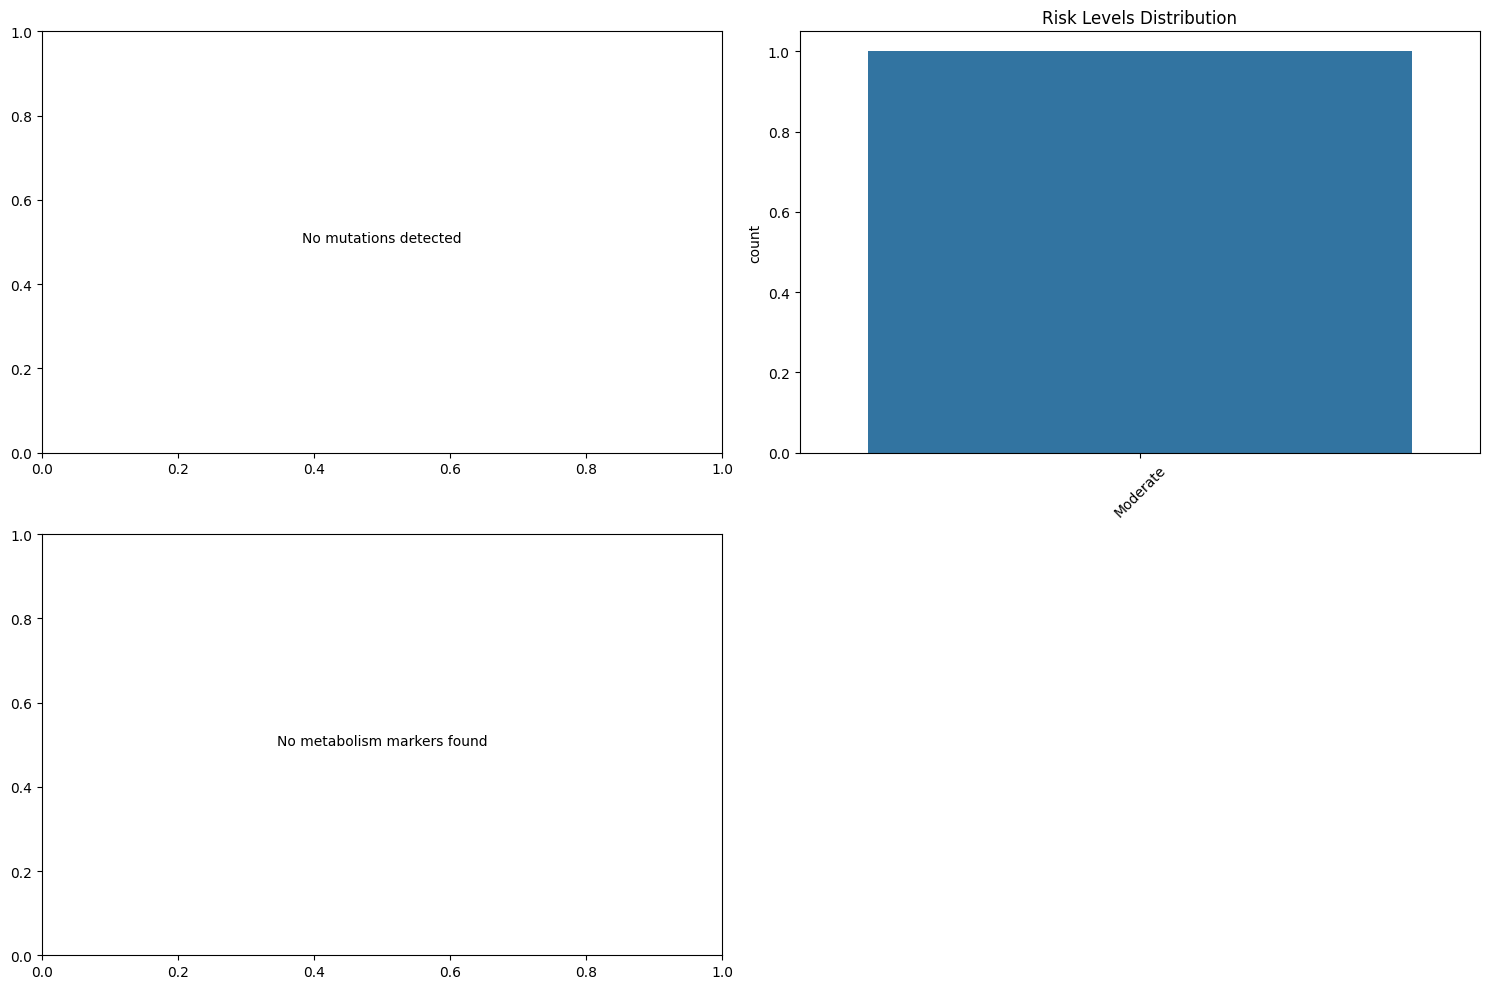

In [4]:
# Create analyzer instance
patient_sequence = sequence = """
    MVSKLSQLQTELLAALLESGLSKEALIQALGEPGPYLLAGEGPLDKGESCGGGRGELAEL
PNGLGETRGSEDETDDDGEDFTPPILKELENLSPEEAAHQKAVVETLLQEDPWRVAKMVK
SYLQQHNIPQREVVDTTGLNQSHLSQHLNKGTPMKTQKRAALYTWYVRKQREVAQQFTHA
GQGGLIEEPTGDELPTKKGRRNRFKWGPASQQILFQAYERQKNPSKEERETLVEECNRAE
CIQRGVSPSQAQGLGSNLVTEVRVYNWFANRRKEEAFRHKLAMDTYSGPPPGPGPGPALP
AHSSPGLPPPALSPSKVHGVRYGQPATSETAEVPSSSGGPLVTVSTPLHQVSPTGLEPSH
SLLSTEAKLVSAAGGPLPPVSTLTALHSLEQTSPGLNQQPQNLIMASLPGVMTIGPGEPA
SLGPTFTNTGASTLVIGLASTQAQSVPVINSMGSSLTTLQPVQFSQPLHPSYQQPLMPPV
QSHVTQSPFMATMAQLQSPHALYSHKPEVAQYTHTGLLPQTMLITDTTNLSALASLTPTK
QVFTSDTEASSESGLHTPASQATTLHVPSQDPASIQHLQPAHRLSASPTVSSSSLVLYQS
SDSSNGQSHLLPSNHSVIETFISTQMASSSQ
    """.replace("\n", "").replace(" ", "")
dna_analyzer = MedicalDNAAnalyzer(patient_sequence)

# Get clinical report
report = dna_analyzer.generate_clinical_report()

# Print easy-to-read summary
dna_analyzer.print_clinical_summary()

# Show visual summary
dna_analyzer.visualize_findings()

##This simplified version focuses on three key medical aspects:

**Mutation Detection:**

Checks for common disease-associated mutations
Provides clinical significance and recommendations
Easy-to-understand results


**Risk Factor Analysis:**

Evaluates genetic risk factors for common diseases
Provides risk levels and recommendations
Focuses on actionable insights


**Drug Metabolism Analysis:**

Analyzes genetic markers related to drug metabolism
Helps with medication decisions
Provides clear clinical recommendations